In [1]:
import pandas as pd          
import numpy as np          # For mathematical calculations
import matplotlib.pyplot as plt  # For plotting graphs
from datetime import datetime    # To access datetime
from pandas import Series        # To work on series
import matplotlib
import warnings                   # To ignore the warnings
warnings.filterwarnings("ignore")
from math import sqrt
from sklearn.metrics import mean_squared_error
from numpy import array

In [2]:
df = pd.read_excel('Talcher_data.xlsx')
df = df.drop(['To Date', 'Unnamed: 0'],axis = 1)
df.head()

,From Date,PM10,PM2.5,WS,WD,AT,RH
0,01-01-2018 00:00,NaN,NaN,NaN,NaN,NaN,NaN
1,01-01-2018 00:15,NaN,NaN,NaN,NaN,NaN,NaN
2,01-01-2018 00:30,NaN,NaN,NaN,NaN,NaN,NaN
3,01-01-2018 00:45,NaN,NaN,NaN,NaN,NaN,NaN
4,01-01-2018 01:00,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df.dtypes


From Date     object
PM10         float64
PM2.5        float64
WS           float64
WD           float64
AT           float64
RH           float64
dtype: object

In [4]:
df.reset_index(inplace = True)
df = df.drop(['index'], axis = 1)
df['From Date'] = pd.to_datetime(df['From Date'])
df['From Date'] = pd.to_datetime(df['From Date'])


df.dtypes
df.head()

,From Date,PM10,PM2.5,WS,WD,AT,RH
0,2018-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN
1,2018-01-01 00:15:00,NaN,NaN,NaN,NaN,NaN,NaN
2,2018-01-01 00:30:00,NaN,NaN,NaN,NaN,NaN,NaN
3,2018-01-01 00:45:00,NaN,NaN,NaN,NaN,NaN,NaN
4,2018-01-01 01:00:00,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
#Set the date as Index
df = df.set_index(df['From Date'],drop = True)
df = df.sort_index()

#Take the mean of each day 
df = df.resample('d').mean()
df.head()
#Removing the outlier
df = df['2018-01':'2020-02']
df_ospcb = df.copy()

df_ospcb.head()

,PM10,PM2.5,WS,WD,AT,RH
From Date,,,,,,
2018-01-01,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-02,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-03,379.369643,195.931398,2.707553,144.437128,27.276702,44.332021
2018-01-04,125.772317,77.229048,2.362824,212.756588,27.790706,64.956118
2018-01-05,76.147460,45.540000,2.831786,199.232619,27.070357,66.933810


In [6]:
date_series = df_ospcb.index
date_series

DatetimeIndex(['2018-01-01', '2018-01-02', '2018-01-03', '2018-01-04',
               '2018-01-05', '2018-01-06', '2018-01-07', '2018-01-08',
               '2018-01-09', '2018-01-10',
               ...
               '2020-02-20', '2020-02-21', '2020-02-22', '2020-02-23',
               '2020-02-24', '2020-02-25', '2020-02-26', '2020-02-27',
               '2020-02-28', '2020-02-29'],
              dtype='datetime64[ns]', name='From Date', length=790, freq='D')

In [7]:
print(df_ospcb.columns)

Index(['PM10', 'PM2.5', 'WS', 'WD', 'AT', 'RH'], dtype='object')


In [8]:
from sklearn.impute import KNNImputer

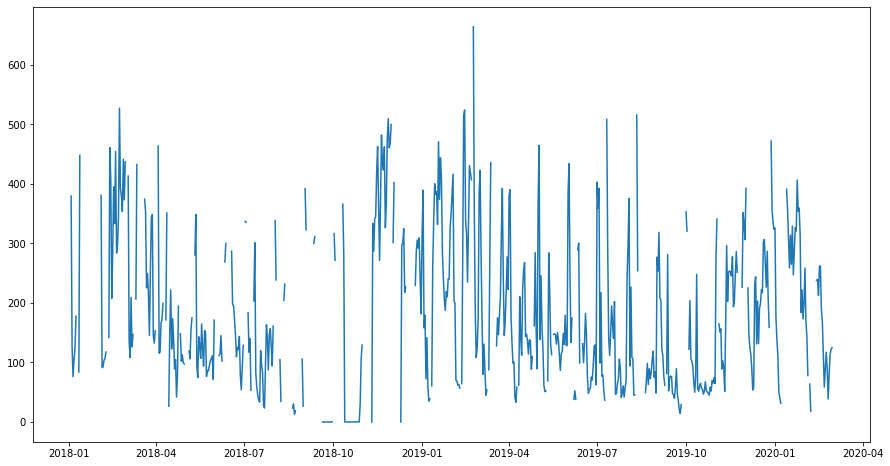

In [9]:
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15,8

plt.plot(df_ospcb['PM10'])

In [10]:
imputer = KNNImputer(n_neighbors=20, weights='uniform')
df_ospcb_imputed_knn = imputer.fit_transform(df_ospcb)

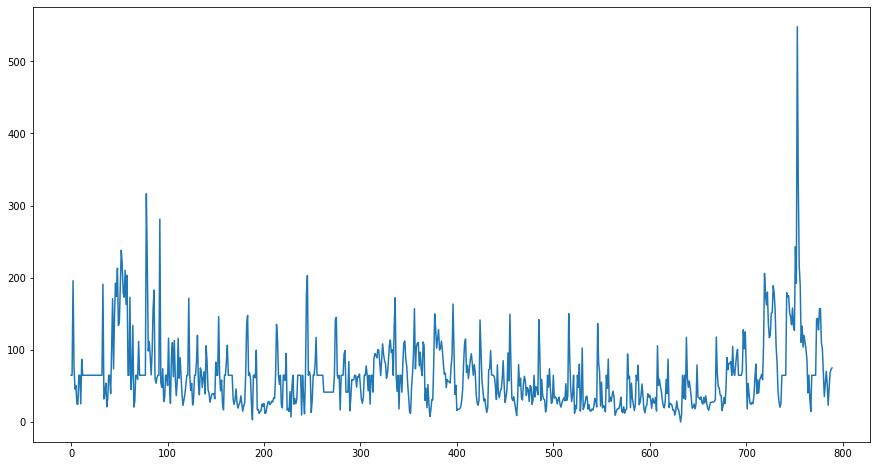

In [11]:
plt.plot(df_ospcb_imputed_knn[:, 1])

In [12]:
df_ospcb_after_impute = pd.DataFrame(data = df_ospcb_imputed_knn, columns = df_ospcb.columns)
df_ospcb_after_impute.head()

,PM10,PM2.5,WS,WD,AT,RH
0,181.228130,64.862639,2.696767,177.267308,28.423651,70.876709
1,181.228130,64.862639,2.696767,177.267308,28.423651,70.876709
2,379.369643,195.931398,2.707553,144.437128,27.276702,44.332021
3,125.772317,77.229048,2.362824,212.756588,27.790706,64.956118
4,76.147460,45.540000,2.831786,199.232619,27.070357,66.933810


In [13]:
df_ospcb_after_impute['Date'] = date_series
df_ospcb_after_impute.head()

,PM10,PM2.5,WS,WD,AT,RH,Date
0,181.228130,64.862639,2.696767,177.267308,28.423651,70.876709,2018-01-01
1,181.228130,64.862639,2.696767,177.267308,28.423651,70.876709,2018-01-02
2,379.369643,195.931398,2.707553,144.437128,27.276702,44.332021,2018-01-03
3,125.772317,77.229048,2.362824,212.756588,27.790706,64.956118,2018-01-04
4,76.147460,45.540000,2.831786,199.232619,27.070357,66.933810,2018-01-05


In [14]:
#Set the date as Index
df_ospcb_after_impute = df_ospcb_after_impute.set_index(df_ospcb_after_impute['Date'], drop = True)
df_ospcb_after_impute = df_ospcb_after_impute.sort_index()
df_ospcb_after_impute.head()

,PM10,PM2.5,WS,WD,AT,RH,Date
Date,,,,,,,
2018-01-01,181.228130,64.862639,2.696767,177.267308,28.423651,70.876709,2018-01-01
2018-01-02,181.228130,64.862639,2.696767,177.267308,28.423651,70.876709,2018-01-02
2018-01-03,379.369643,195.931398,2.707553,144.437128,27.276702,44.332021,2018-01-03
2018-01-04,125.772317,77.229048,2.362824,212.756588,27.790706,64.956118,2018-01-04
2018-01-05,76.147460,45.540000,2.831786,199.232619,27.070357,66.933810,2018-01-05


In [15]:
df_ospcb_after_impute = df_ospcb_after_impute.drop(['Date'], axis = 1)
df_ospcb_after_impute.head()

,PM10,PM2.5,WS,WD,AT,RH
Date,,,,,,
2018-01-01,181.228130,64.862639,2.696767,177.267308,28.423651,70.876709
2018-01-02,181.228130,64.862639,2.696767,177.267308,28.423651,70.876709
2018-01-03,379.369643,195.931398,2.707553,144.437128,27.276702,44.332021
2018-01-04,125.772317,77.229048,2.362824,212.756588,27.790706,64.956118
2018-01-05,76.147460,45.540000,2.831786,199.232619,27.070357,66.933810


In [16]:
df_index_list = df_ospcb_after_impute.index.values
years = pd.DatetimeIndex(df_index_list)
list_year = years.year
list_month = years.month
list_day = years.day
list_dayOfWeek = years.dayofweek
df_ospcb_after_impute['year'] = list_year 
df_ospcb_after_impute['month'] = list_month 
df_ospcb_after_impute['day'] = list_day
df_ospcb_after_impute['day_of_week'] = list_dayOfWeek

#Determining Weekend
def weekend(row):
   if (row == 5) or (row == 6):
       return 1
   else:
       return 0

df_ospcb_after_impute['weekend'] = df_ospcb_after_impute['day_of_week'].apply(weekend)
df_ospcb_after_impute.head()

,PM10,PM2.5,WS,WD,AT,RH,year,month,day,day_of_week,weekend
Date,,,,,,,,,,,
2018-01-01,181.228130,64.862639,2.696767,177.267308,28.423651,70.876709,2018,1,1,0,0
2018-01-02,181.228130,64.862639,2.696767,177.267308,28.423651,70.876709,2018,1,2,1,0
2018-01-03,379.369643,195.931398,2.707553,144.437128,27.276702,44.332021,2018,1,3,2,0
2018-01-04,125.772317,77.229048,2.362824,212.756588,27.790706,64.956118,2018,1,4,3,0
2018-01-05,76.147460,45.540000,2.831786,199.232619,27.070357,66.933810,2018,1,5,4,0


In [17]:
corr_mat = df_ospcb_after_impute.corr(method = 'pearson')
print(corr_mat)

                 PM10     PM2.5        WS  ...       day  day_of_week   weekend
PM10         1.000000  0.714541  0.265210  ... -0.092427    -0.022989 -0.012735
PM2.5        0.714541  1.000000  0.417154  ... -0.012819    -0.019522 -0.009167
WS           0.265210  0.417154  1.000000  ... -0.005503    -0.008232 -0.014417
WD          -0.416532 -0.364011 -0.210642  ... -0.006650     0.006732  0.001949
AT          -0.166526 -0.228333 -0.051632  ...  0.009756    -0.008562 -0.008436
RH          -0.468953 -0.435338 -0.043605  ...  0.062812     0.001620 -0.016983
year         0.006142  0.037924  0.313977  ... -0.003916     0.003902 -0.000598
month       -0.126495 -0.165092 -0.064446  ...  0.012298     0.003619  0.009268
day         -0.092427 -0.012819 -0.005503  ...  1.000000    -0.003235 -0.009140
day_of_week -0.022989 -0.019522 -0.008232  ... -0.003235     1.000000  0.789942
weekend     -0.012735 -0.009167 -0.014417  ... -0.009140     0.789942  1.000000

[11 rows x 11 columns]


In [18]:
corr_mat.to_excel("correlation_matrix.xlsx")

In [19]:
mean_ospcb = df_ospcb_after_impute['PM2.5'].min()
std_dev_ospcb = df_ospcb_after_impute['PM2.5'].max() - df_ospcb_after_impute['PM2.5'].min()

cols = ['PM10','PM2.5','WS','WD','AT','RH','year','month','day','day_of_week','weekend']
for field in ['PM10','PM2.5','WS','WD','AT','RH']:    
   df_ospcb_after_impute[field][df_ospcb_after_impute[field] > (df_ospcb_after_impute[field].mean() + 1.5*df_ospcb_after_impute[field].std())] = np.nan


In [20]:
for field in cols:
   print(field, df_ospcb_after_impute[field].isna().sum())

PM10 79
PM2.5 63
WS 70
WD 68
AT 38
RH 48
year 0
month 0
day 0
day_of_week 0
weekend 0


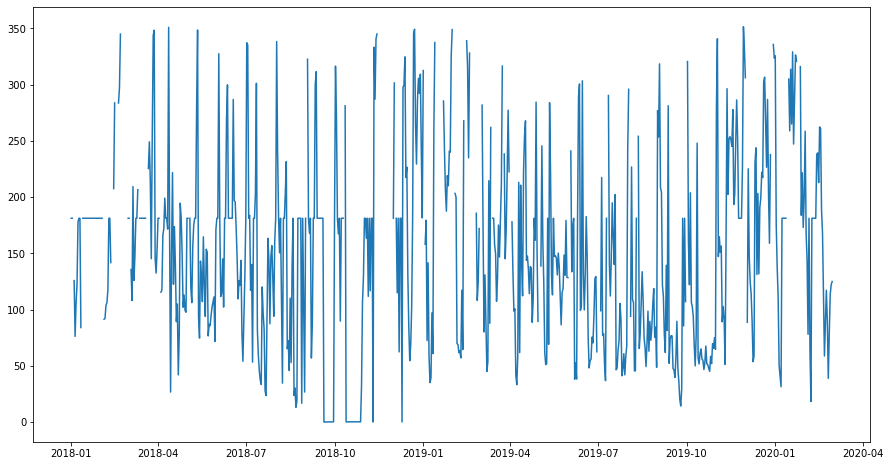

In [21]:
plt.plot(df_ospcb_after_impute['PM10'])

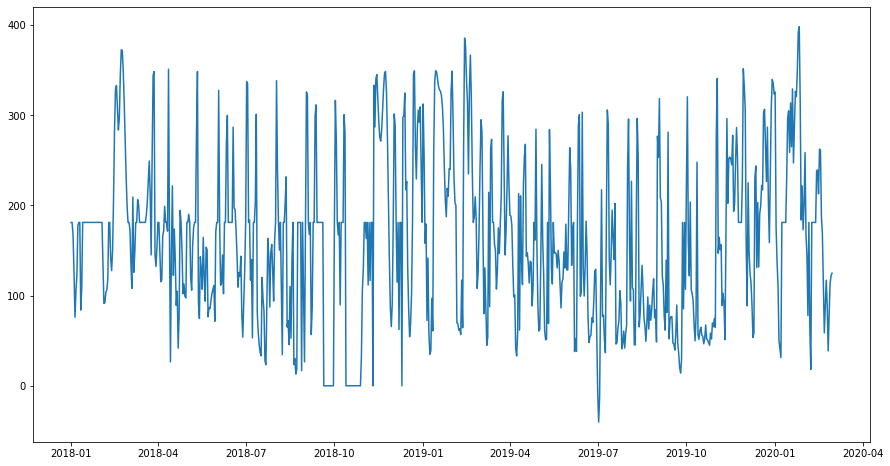

In [22]:
for field in ['PM10','PM2.5','WS','WD','AT','RH']:
   df_ospcb_after_impute[field] = df_ospcb_after_impute[field].interpolate(method = 'spline', order = 3)
plt.plot(df_ospcb_after_impute['PM10'])

In [23]:
for field in cols:
   print(field, df_ospcb_after_impute[field].isna().sum())

PM10 0
PM2.5 0
WS 0
WD 0
AT 0
RH 0
year 0
month 0
day 0
day_of_week 0
weekend 0


In [24]:
  #df_ospcb_after_impute =  df_ospcb_after_impute.iloc[1:,:]
  df_ospcb_after_impute.head()

,PM10,PM2.5,WS,WD,AT,RH,year,month,day,day_of_week,weekend
Date,,,,,,,,,,,
2018-01-01,181.228130,64.862639,2.696767,177.267308,28.423651,70.876709,2018,1,1,0,0
2018-01-02,181.228130,64.862639,2.696767,177.267308,28.423651,70.876709,2018,1,2,1,0
2018-01-03,167.357877,81.317723,2.707553,144.437128,27.276702,44.332021,2018,1,3,2,0
2018-01-04,125.772317,77.229048,2.362824,212.756588,27.790706,64.956118,2018,1,4,3,0
2018-01-05,76.147460,45.540000,2.831786,199.232619,27.070357,66.933810,2018,1,5,4,0


In [25]:
cols = ['PM10','PM2.5','WS','WD','AT','RH','year','month','day','day_of_week','weekend']
for field in cols:
   df_ospcb_after_impute[field] = (df_ospcb_after_impute[field] - df_ospcb_after_impute[field].min())/(df_ospcb_after_impute[field].max() - df_ospcb_after_impute[field].min())

df_ospcb_after_impute = df_ospcb_after_impute[['WS','PM2.5','WD','AT','RH','year','month','day','day_of_week','weekend','PM10']]
df_ospcb_after_impute.head()

,WS,PM2.5,WD,AT,RH,year,month,day,day_of_week,weekend,PM10
Date,,,,,,,,,,,
2018-01-01,0.718949,0.382453,0.495113,0.786270,0.693487,0.0,0.0,0.000000,0.000000,0.0,0.504917
2018-01-02,0.718949,0.382453,0.495113,0.786270,0.693487,0.0,0.0,0.033333,0.166667,0.0,0.504917
2018-01-03,0.725250,0.479545,0.261516,0.664081,0.326616,0.0,0.0,0.066667,0.333333,0.0,0.473267
2018-01-04,0.523866,0.455420,0.747632,0.718840,0.611659,0.0,0.0,0.100000,0.500000,0.0,0.378376
2018-01-05,0.797824,0.268441,0.651404,0.642098,0.638993,0.0,0.0,0.133333,0.666667,0.0,0.265140


In [26]:
df_ospcb_after_impute = df_ospcb_after_impute[['WS','PM10','WD','AT','RH','year','month','day','day_of_week','weekend','PM2.5']]
df_ospcb_after_impute.head()

,WS,PM10,WD,AT,RH,year,month,day,day_of_week,weekend,PM2.5
Date,,,,,,,,,,,
2018-01-01,0.718949,0.504917,0.495113,0.786270,0.693487,0.0,0.0,0.000000,0.000000,0.0,0.382453
2018-01-02,0.718949,0.504917,0.495113,0.786270,0.693487,0.0,0.0,0.033333,0.166667,0.0,0.382453
2018-01-03,0.725250,0.473267,0.261516,0.664081,0.326616,0.0,0.0,0.066667,0.333333,0.0,0.479545
2018-01-04,0.523866,0.378376,0.747632,0.718840,0.611659,0.0,0.0,0.100000,0.500000,0.0,0.455420
2018-01-05,0.797824,0.265140,0.651404,0.642098,0.638993,0.0,0.0,0.133333,0.666667,0.0,0.268441


In [27]:
def split_sequences(sequences, n_steps_in, n_steps_out):
	X, y = list(), list()
	for i in range(len(sequences)):
		# find the end of this pattern
		end_ix = i + n_steps_in
		out_end_ix = end_ix + n_steps_out-1
		# check if we are beyond the dataset
		if out_end_ix > len(sequences):
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = sequences[i:end_ix, :-1], sequences[end_ix-1:out_end_ix, -1]
		X.append(seq_x)
		y.append(seq_y)
	return array(X), array(y)


# choose a number of time steps
n_steps_in, n_steps_out = 15, 4

X, y = split_sequences(df_ospcb_after_impute.values, n_steps_in, n_steps_out)

X_test, y_test = X[-1], y[-1]

for i in range(n_steps_out):
	X = np.delete(X, X.shape[0] - 1, 0)
	y = np.delete(y, y.shape[0] - 1, 0)

n_features = X.shape[2]
X_svr = X[:,:,0]

In [28]:
from sklearn.multioutput import MultiOutputRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

# regr_multirf = MultiOutputRegressor(SVR(kernel='rbf'))

regr_multirf = MultiOutputRegressor(estimator=SVR(kernel='linear'))
regr_multirf.fit(X_svr, y)

MultiOutputRegressor(estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                                   epsilon=0.1, gamma='scale', kernel='linear',
                                   max_iter=-1, shrinking=True, tol=0.001,
                                   verbose=False),
                     n_jobs=None)

In [29]:
X_test.shape

(15, 10)

In [30]:
X_test = X_test.reshape((1, n_steps_in, n_features))
X_test_new = X_test[:,:,0]
yhat = regr_multirf.predict(X_test_new)

In [31]:
print(X_test_new.shape)
print(yhat.shape)

(1, 15)
(1, 4)


In [32]:
print(yhat.shape)
print(y_test.shape)

(1, 4)
(4,)


In [33]:
X.shape

(769, 15, 10)

In [34]:
yhat = (yhat[0]*std_dev_ospcb)+mean_ospcb
y_test = (y_test*std_dev_ospcb)+mean_ospcb
print(yhat)
print(y_test)

[271.13021826 262.69716507 251.5945925  237.16398477]
[152.26064636 220.08708706 236.93141307 242.1576541 ]


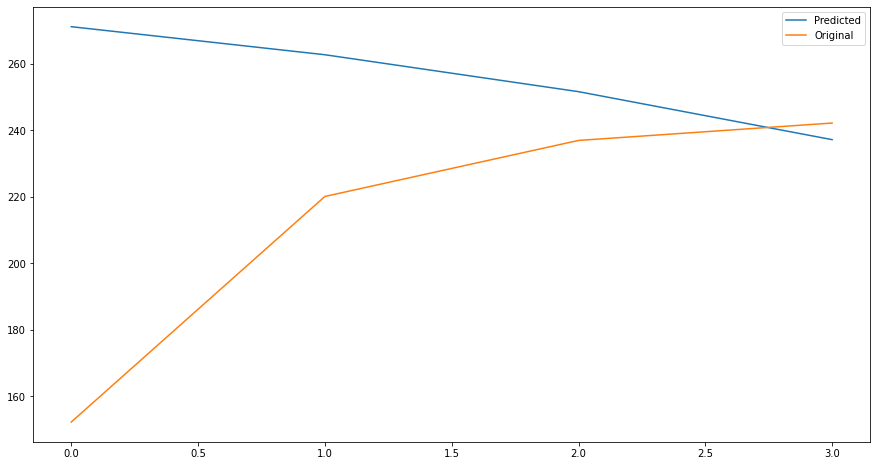

In [35]:
#Setting default Plot Size
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15,8

# fig, ax = plt.subplots()
plt.plot(yhat, label = 'Predicted')
plt.plot(y_test, label = 'Original')
plt.legend()
plt.show()

In [36]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from math import sqrt
def mean_absolute_percentage_error(y_true, y_pred): 
   return np.mean(np.abs((y_true - y_pred) / y_true)) * 100


rms_new = sqrt(mean_squared_error(y_test, yhat))
print(rms_new)

mse_new = mean_squared_error(y_test, yhat)
print(mse_new)

mae_new = mean_absolute_error(y_test, yhat)
print(mae_new)

mape_new = mean_absolute_percentage_error(y_test, yhat)
print(mape_new)

63.611200738414425
4046.3848593828557
45.28412467053606
26.420322391529442
